# Exercises

In [1]:
# standard imports
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

from sklearn.preprocessing import MinMaxScaler

# possible modules, may just wrangle like before
import wrangle
import summarize

<div class="alert alert-info">
    <strong>Workflow</strong>
<br>
<br>
<strong>Throughout the exercises, you may wish to do your work in a notebook, then transfer any functions you've created to an external python script.
<br>
Keep in mind this is not always a linear process! You will probably be cycling between a notebook and an external python script frequently.
<br>
Remember to run your code often to check for correct output and/or errors.</strong>
</div>

# Zillow

### For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

### **You will have a zillow.ipynb file and a helper file for each section in the pipeline.**

## Acquire and Summarize

1. **Acquire data from the cloud database.**

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

*Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for* airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
# called acquire module to bring in data.
df = wrangle.acquire_zillow()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.00,NaN,NaN,3.00,4.00,NaN,9.00,3.00,...,"60,374,608,001,014.00",-0.00,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [3]:
df.shape

(52319, 68)

In [4]:
# checked if query call met requirements above.

# Check for duplicates across all columns
duplicates_in_df = df.duplicated()
duplicates_in_df.value_counts()

False    52319
Name: count, dtype: int64

In [5]:
df.duplicated(subset=None).sum()

0

In [6]:
df.duplicated(subset='parcelid').value_counts()

False    52319
Name: count, dtype: int64

In [7]:
duplicate_parcel_ids = pd.DataFrame(df.parcelid[df.duplicated(subset='parcelid')])

In [8]:
duplicate_parcel_ids

,parcelid


In [9]:
df = df.drop_duplicates(subset='parcelid', keep='last')

In [10]:
df.duplicated(subset='parcelid').value_counts()

False    52319
Name: count, dtype: int64

In [11]:
# no nulls in latitude
df.latitude.isna().sum()

0

In [12]:
# no nulls in longitude
df.longitude.isna().sum()

0

In [13]:
# checked to see if nulls are still in column as described
df.airconditioningtypeid.isna().sum()

38704

2. **Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)**

In [14]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror,buildingclassdesc
count,"52,319.00","52,319.00","13,615.00",70.00,47.00,"52,319.00","52,319.00",0.00,"33,654.00","52,184.00",...,81.00,"52,237.00","52,318.00","52,319.00","52,318.00","52,315.00","2,068.00","52,198.00","52,319.00",0.00
mean,"1,496,887.68","12,996,817.91",2.44,7.10,678.98,2.30,3.30,NaN,6.26,2.31,...,1.00,"196,638.47","529,828.67","2,016.00","333,494.64","6,454.80",14.10,"60,502,451,458,871.00",0.02,NaN
std,"859,431.03","3,350,951.35",3.85,2.67,711.83,1.02,0.95,NaN,1.72,1.02,...,0.00,"254,288.05","751,835.82",0.00,"570,515.68","8,752.55",2.40,"1,861,144,772,484.99",0.18,NaN
min,349.00,"10,711,855.00",1.00,2.00,38.00,0.00,0.00,NaN,1.00,1.00,...,1.00,129.00,"1,000.00","2,016.00",161.00,49.18,4.00,"60,371,011,101,000.00",-4.66,NaN
25%,"757,581.00","11,510,167.50",1.00,7.00,263.50,2.00,3.00,NaN,5.00,2.00,...,1.00,"77,159.00","194,020.50","2,016.00","76,194.00","2,660.97",14.00,"60,374,012,032,009.00",-0.02,NaN
50%,"1,500,095.00","12,578,254.00",1.00,7.00,512.00,2.00,3.00,NaN,6.00,2.00,...,1.00,"131,910.00","374,008.00","2,016.00","218,079.00","4,650.62",15.00,"60,376,203,012,018.00",0.01,NaN
75%,"2,241,247.50","14,130,361.00",1.00,7.00,809.50,3.00,4.00,NaN,8.00,3.00,...,1.00,"226,455.00","619,358.00","2,016.00","408,779.50","7,379.32",15.00,"60,590,423,261,001.00",0.04,NaN
max,"2,982,270.00","167,687,839.00",13.00,21.00,"3,560.00",18.00,14.00,NaN,12.00,18.00,...,1.00,"9,164,901.00","49,061,236.00","2,016.00","48,952,198.00","586,639.30",99.00,"483,030,105,084,015.00",5.26,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [16]:
df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
buildingclassdesc           float64
heatingorsystemdesc          object
propertylandusedesc          object
storydesc                    object
typeconstructiondesc         object
Length: 68, dtype: object

In [17]:
df.shape

(52319, 68)

In [18]:
for col in df.columns[df.dtypes == 'object']:
    print(df[col].value_counts())
    print()
    print('--------------------')
    print()

propertycountylandusecode
0100    26713
122     13045
0101     6399
1111     3353
1        1066
1110     1024
0104      367
010G       93
0103       91
0108       57
010M       52
0109       18
1112        8
0110        6
0113        6
0141        4
0102        3
0105        3
010V        2
0111        2
0130        2
0131        1
0133        1
0115        1
010L        1
0114        1
Name: count, dtype: int64

--------------------

propertyzoningdesc
LAR1          6480
LARS          1380
LBR1N         1109
SCUR2          712
LARE11         611
              ... 
LCR3800015       1
PSR6*            1
LARE             1
MYR3PY           1
BFA15000*        1
Name: count, Length: 1286, dtype: int64

--------------------

taxdelinquencyflag
Y    2068
Name: count, dtype: int64

--------------------

transactiondate
2017-06-30    809
2017-04-28    614
2017-05-31    565
2017-07-28    546
2017-08-31    528
             ... 
2017-05-07      1
2017-05-13      1
2017-05-20      1
2017-06-11    

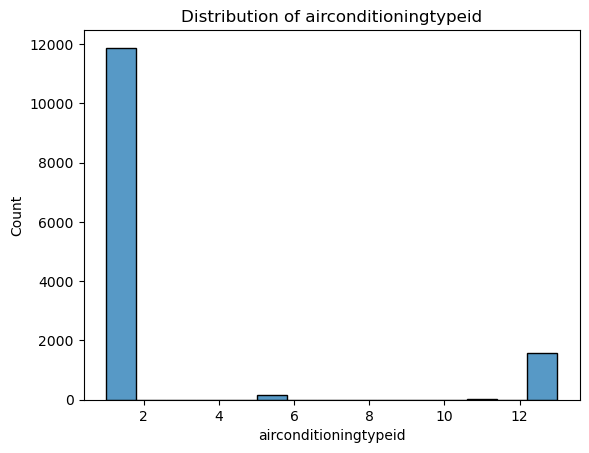

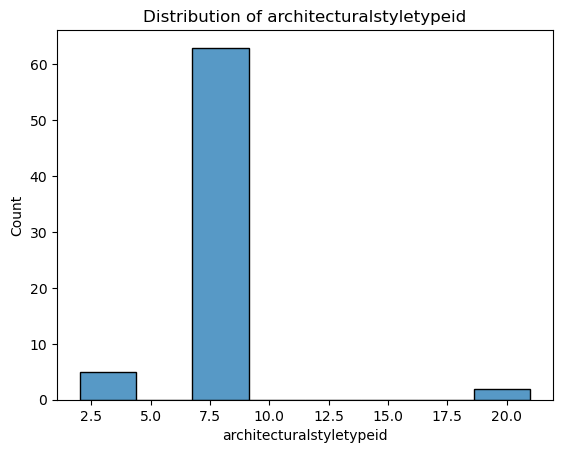

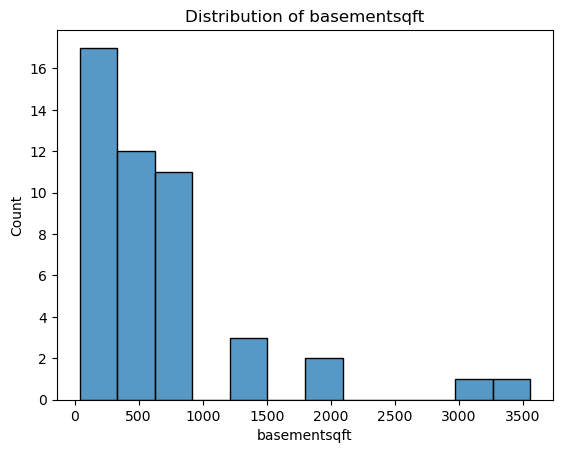

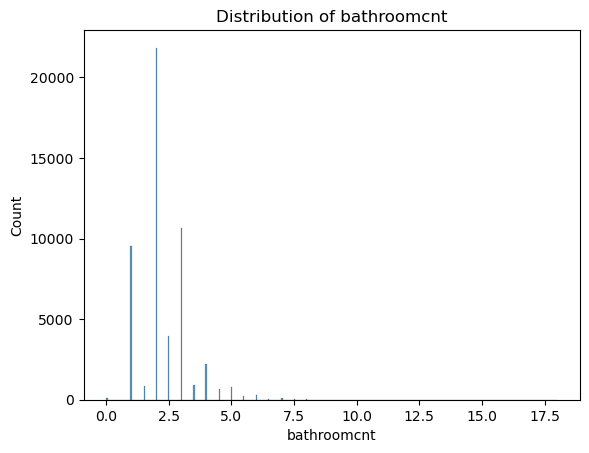

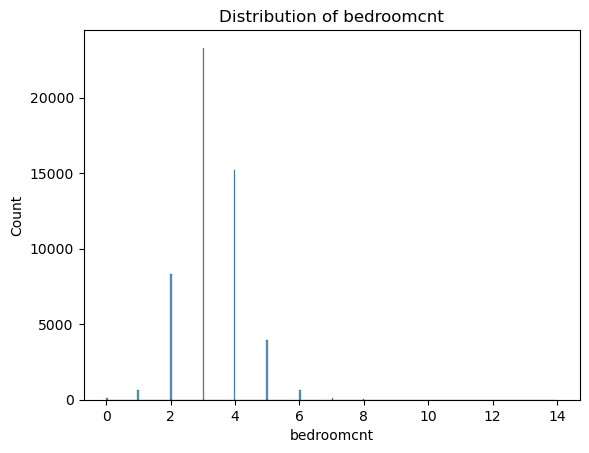

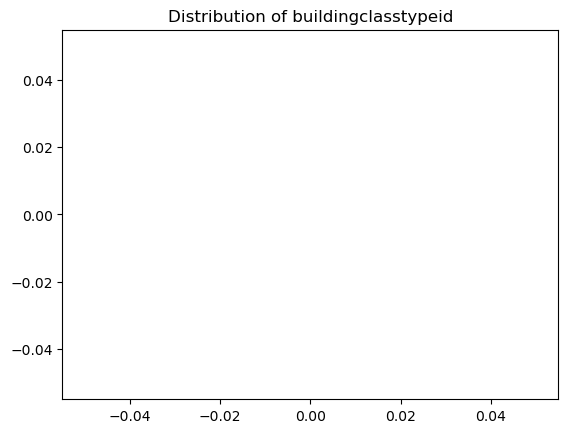

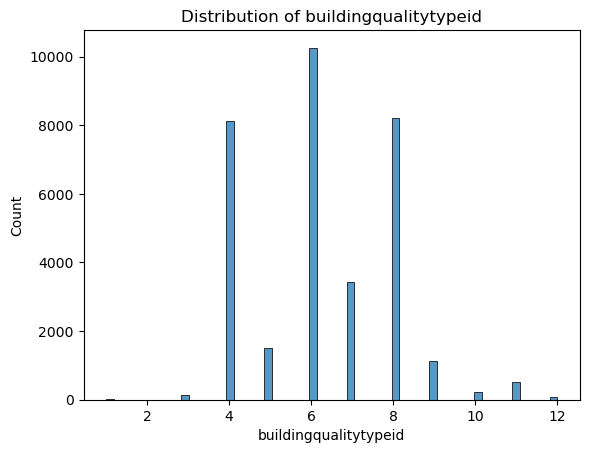

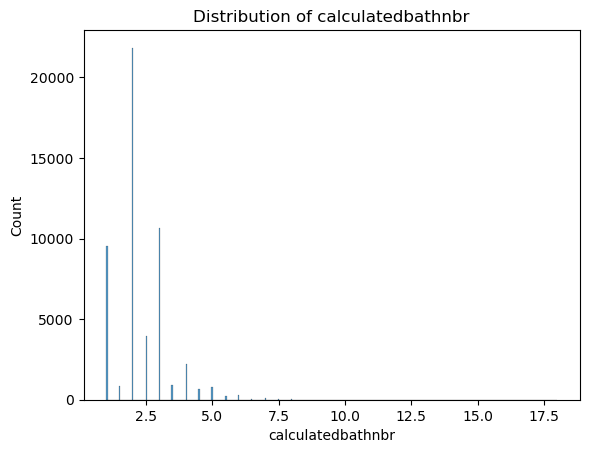

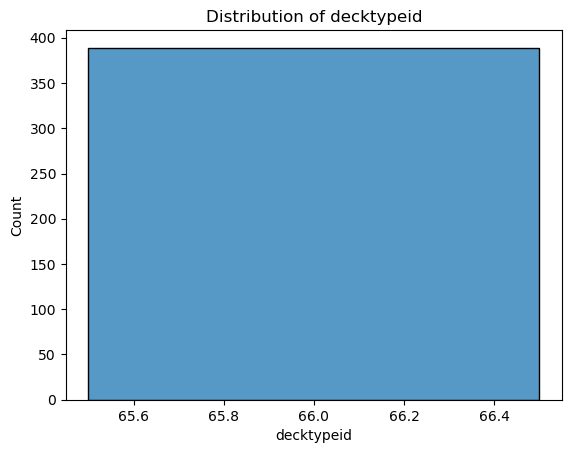

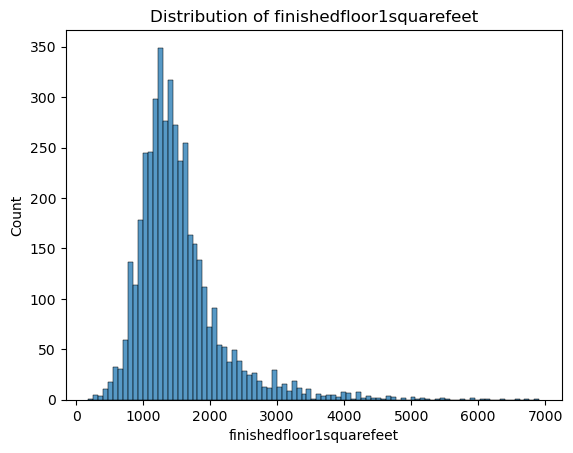

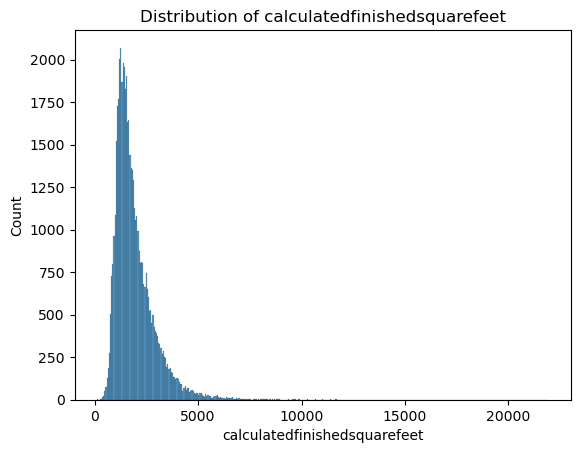

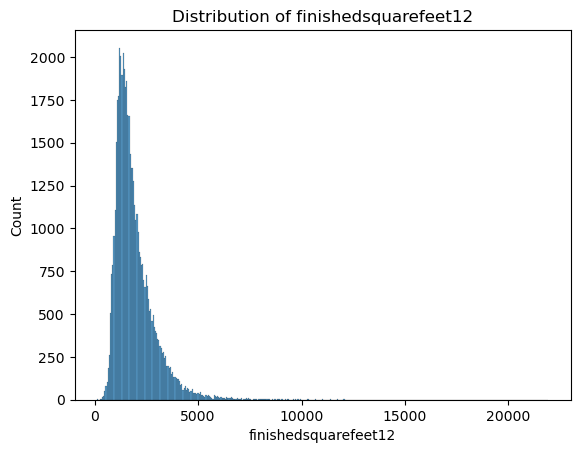

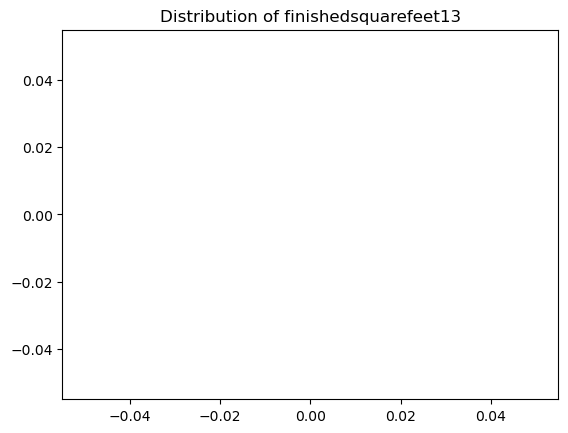

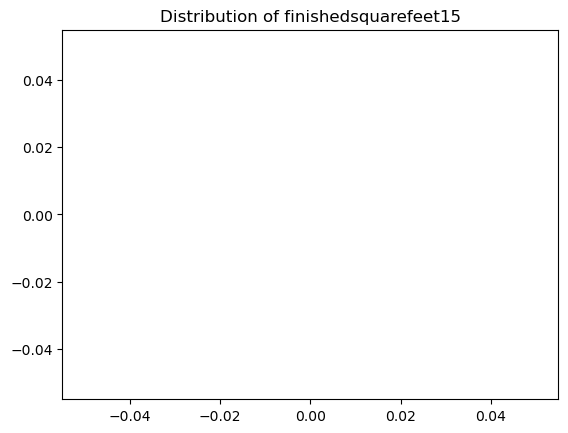

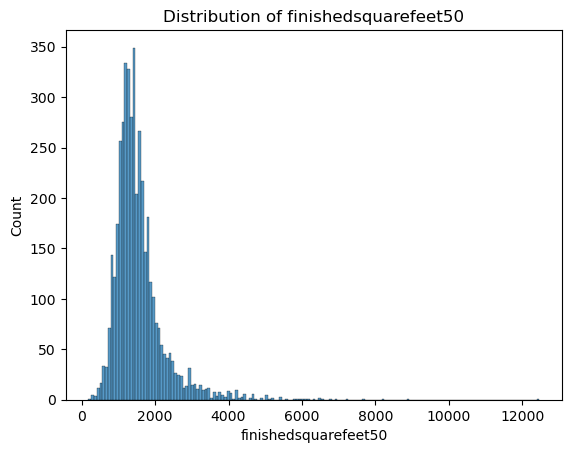

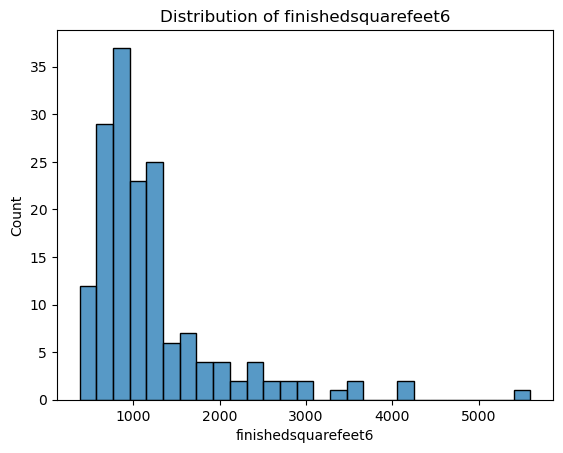

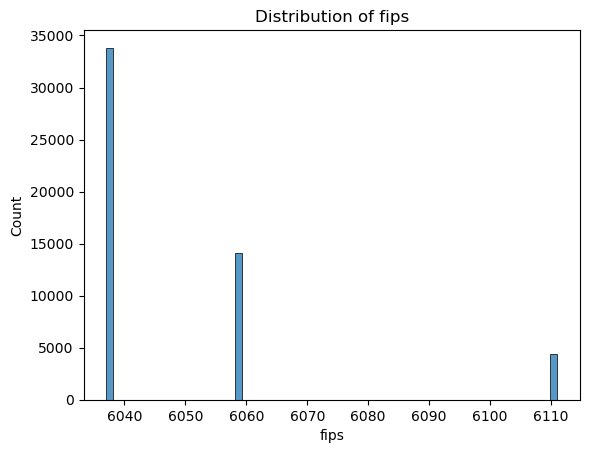

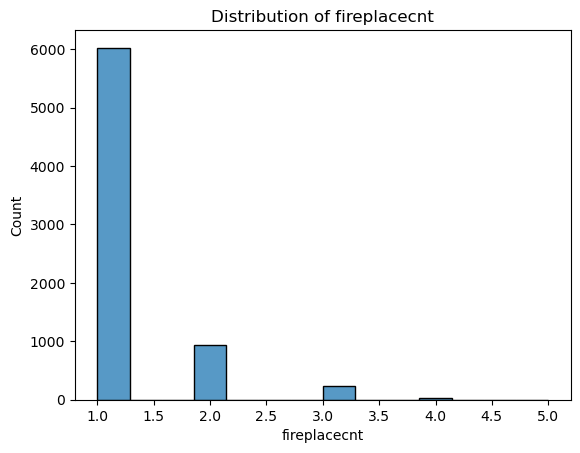

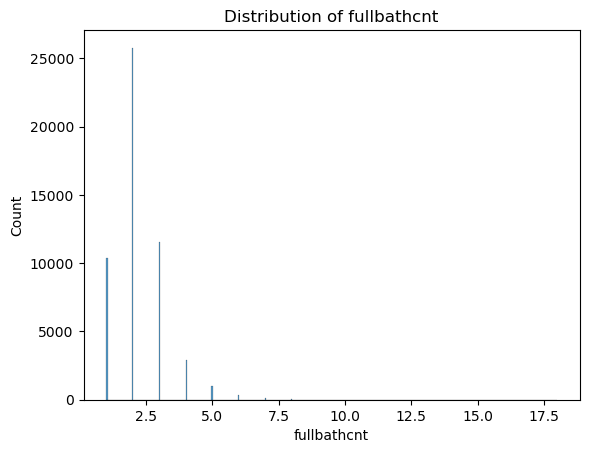

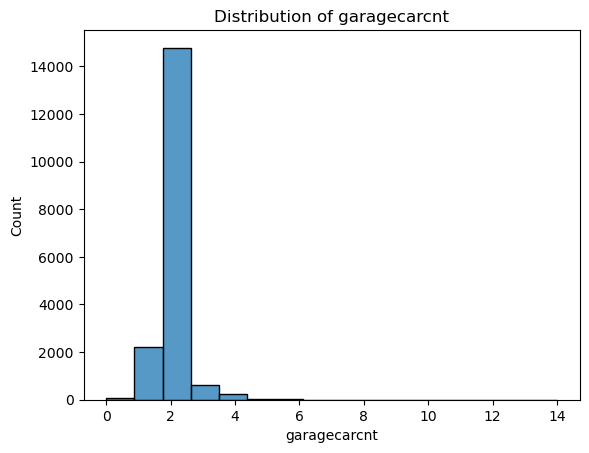

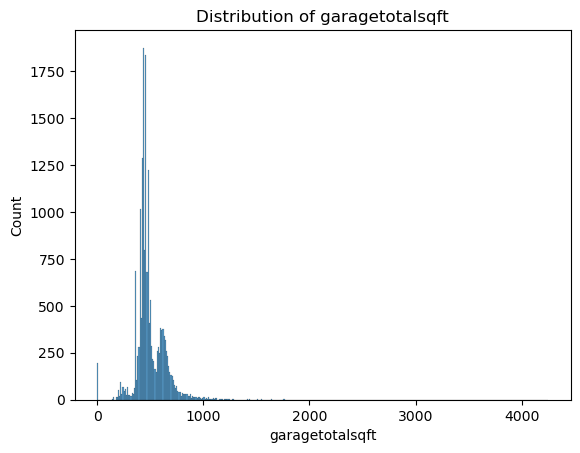

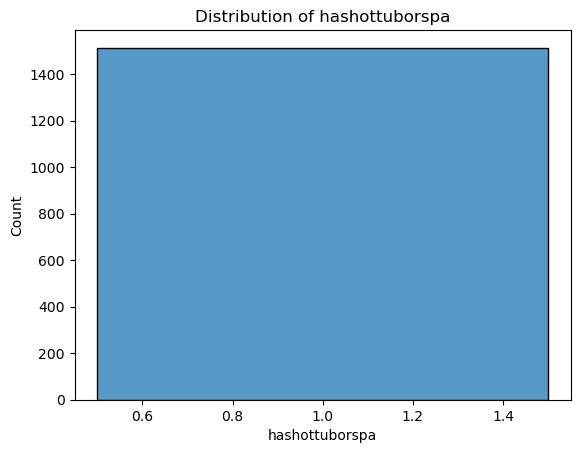

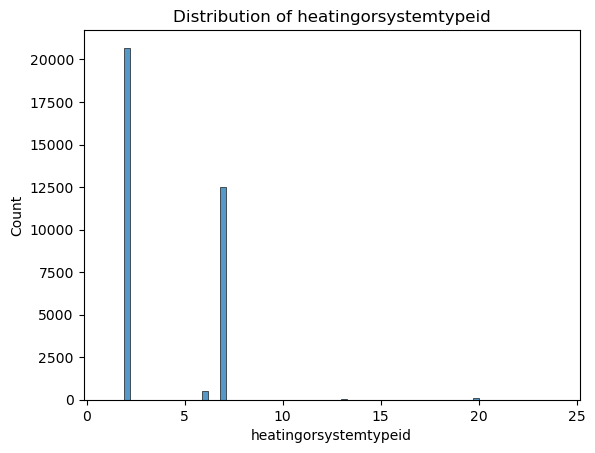

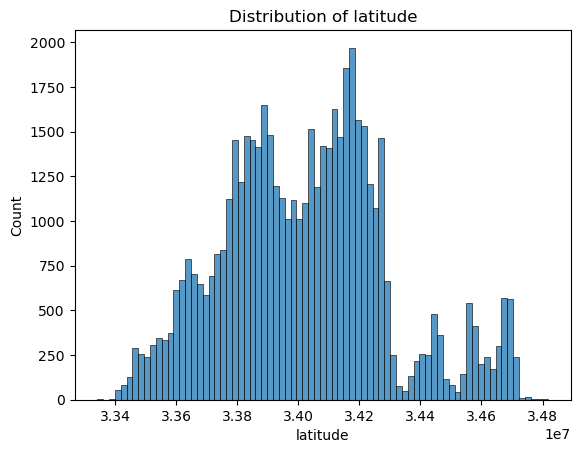

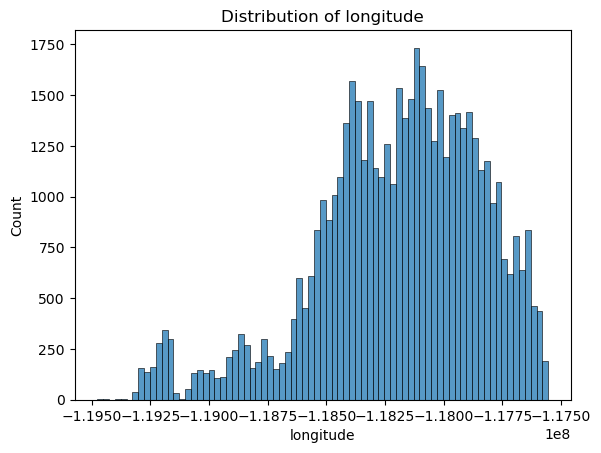

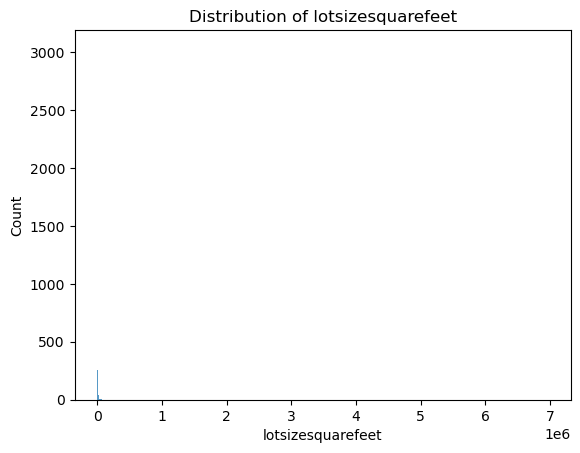

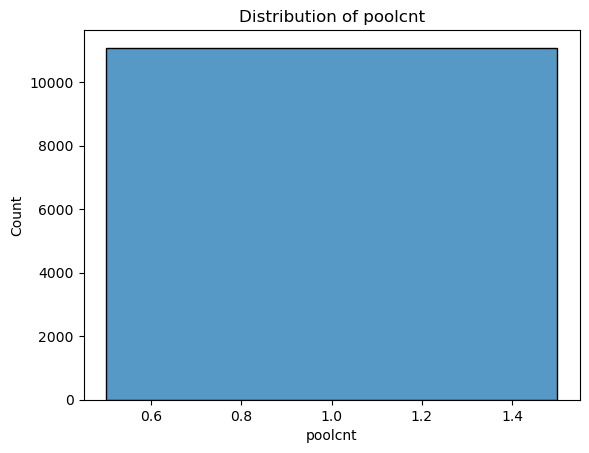

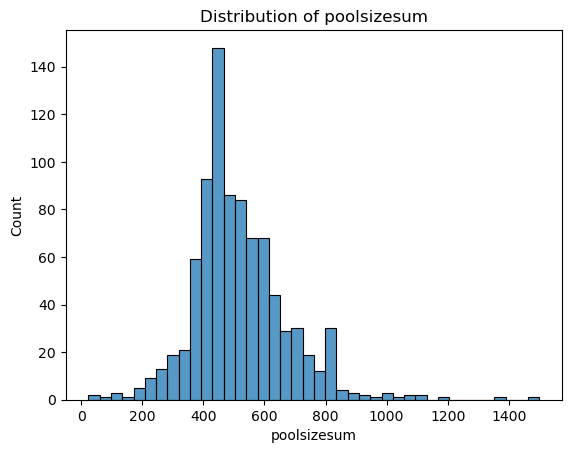

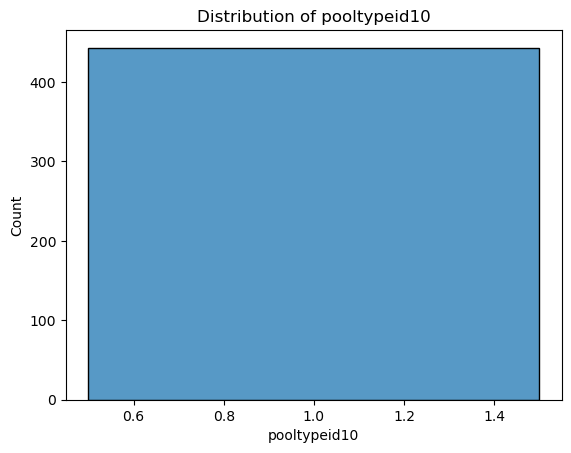

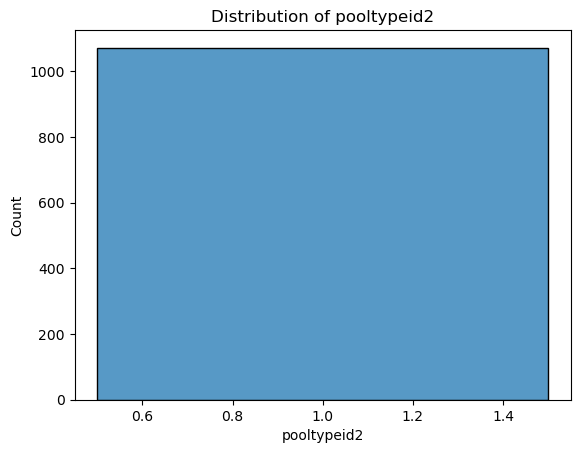

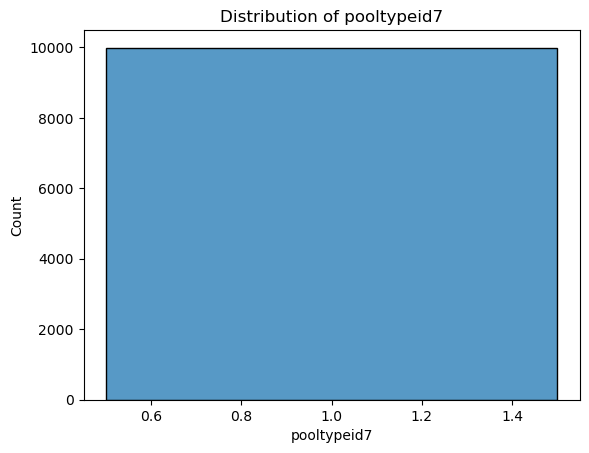

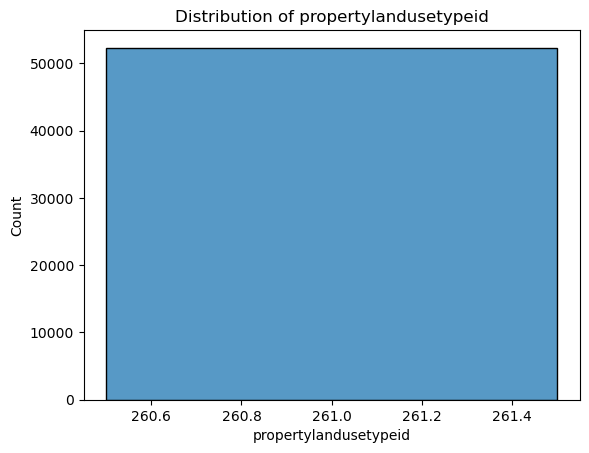

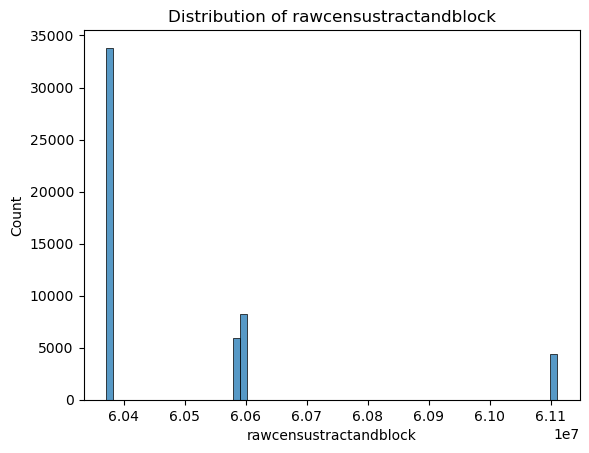

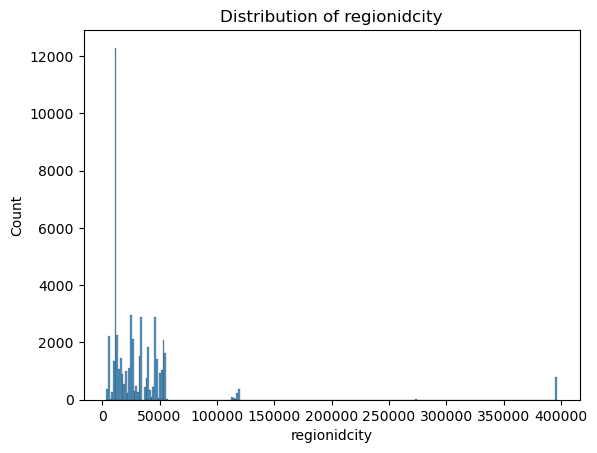

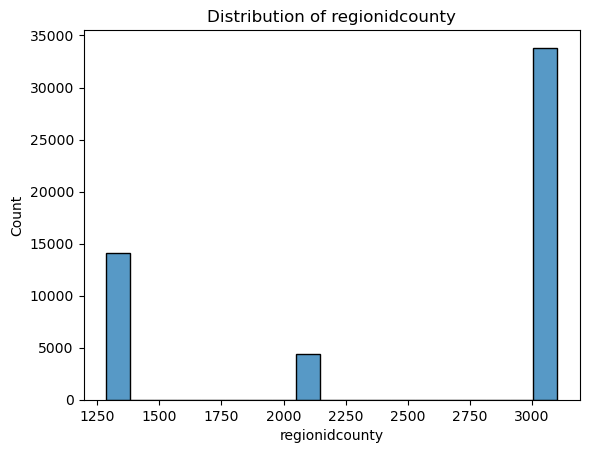

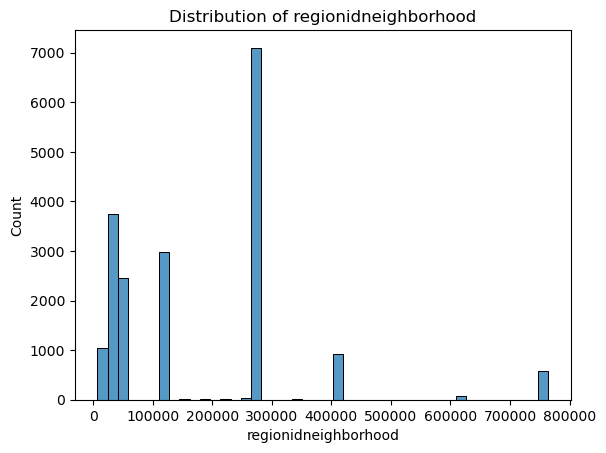

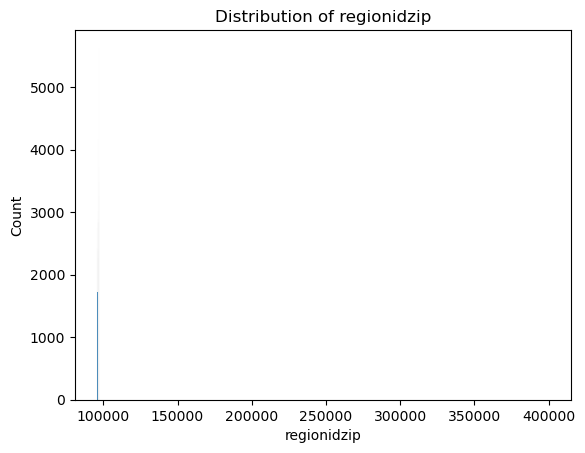

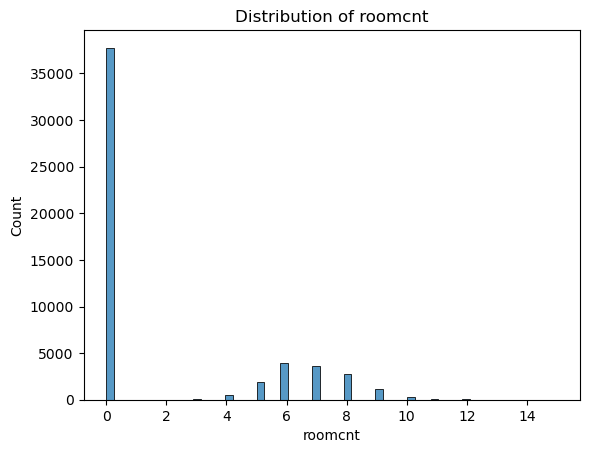

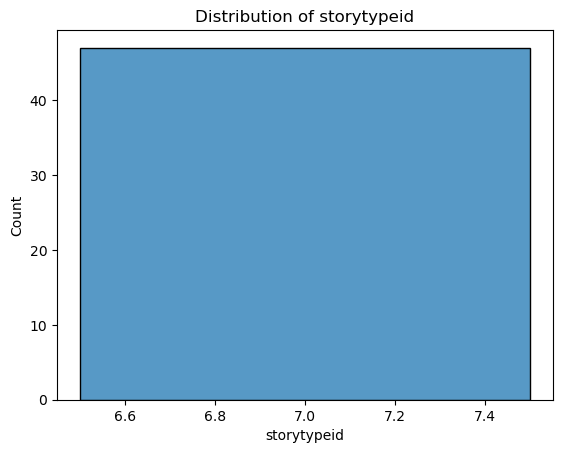

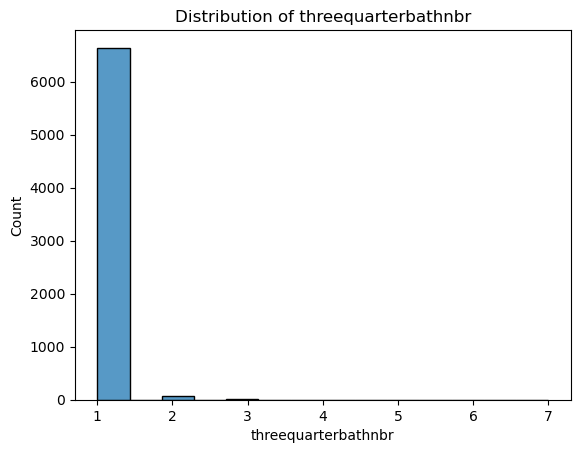

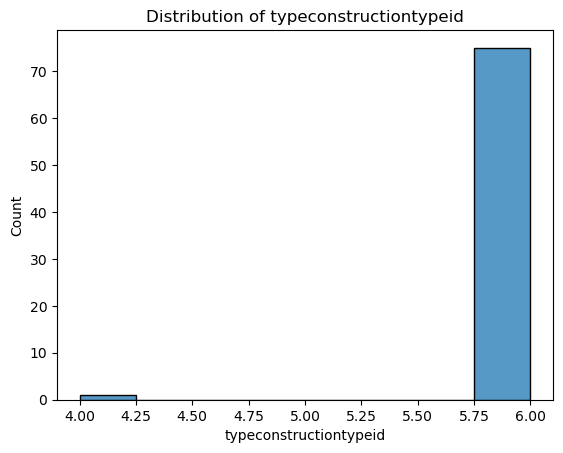

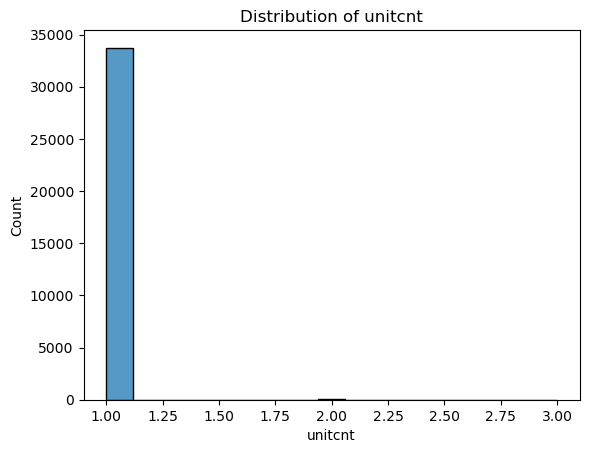

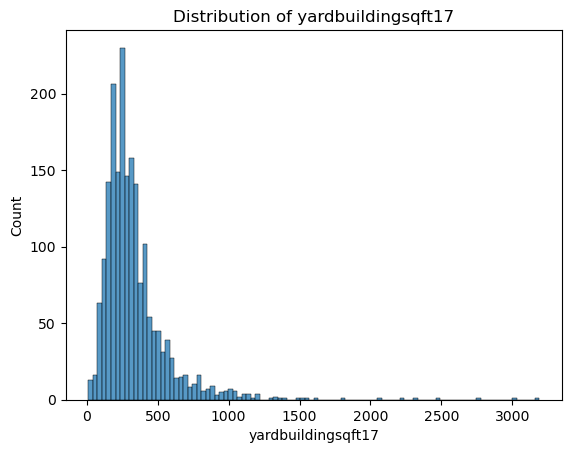

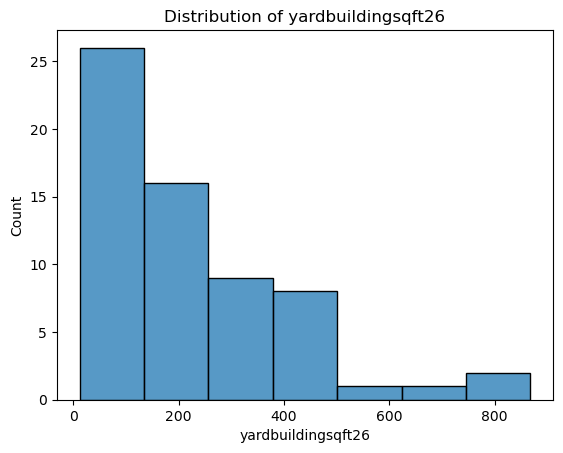

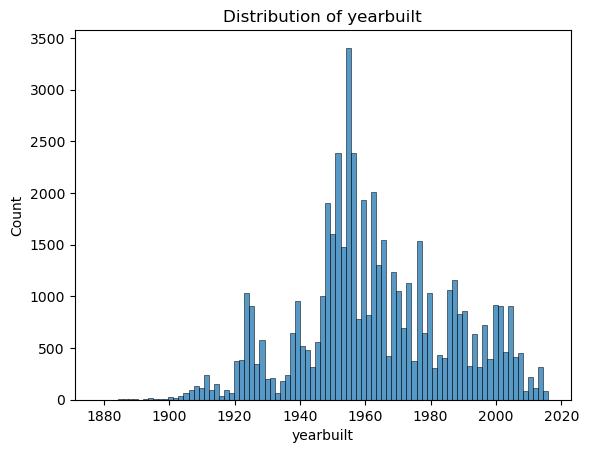

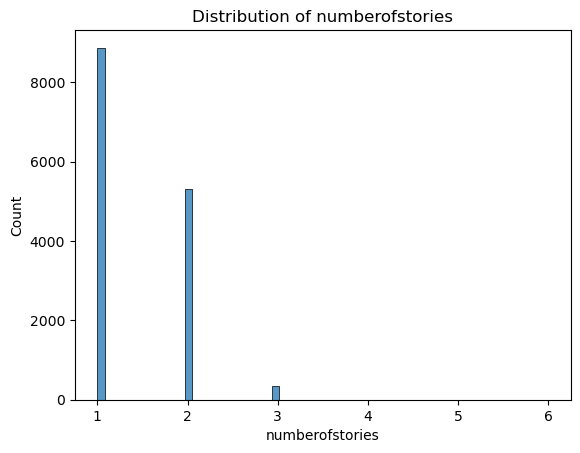

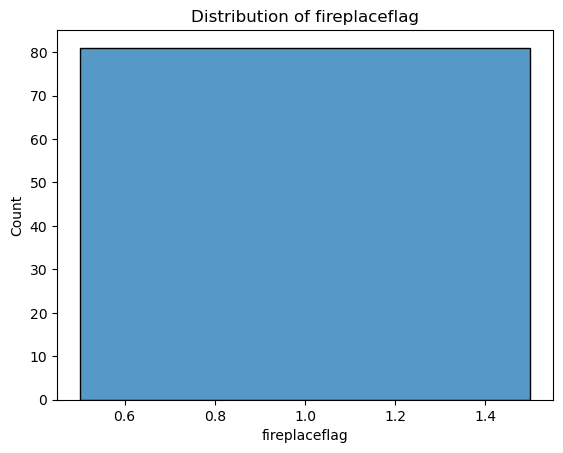

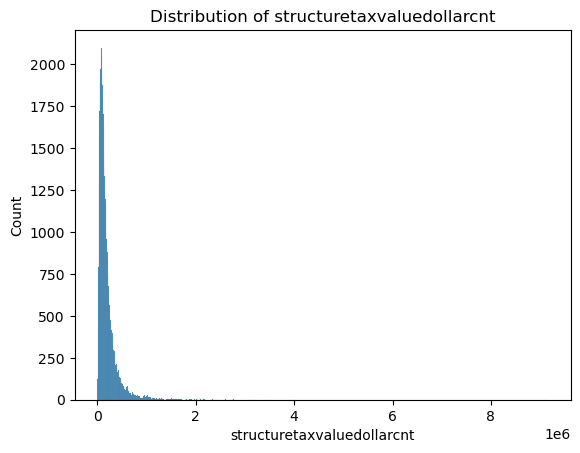

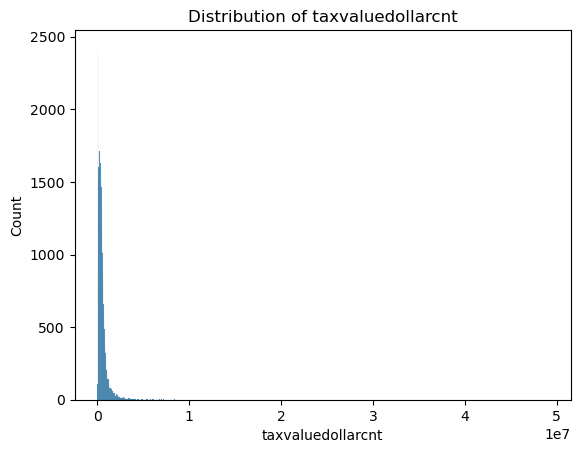

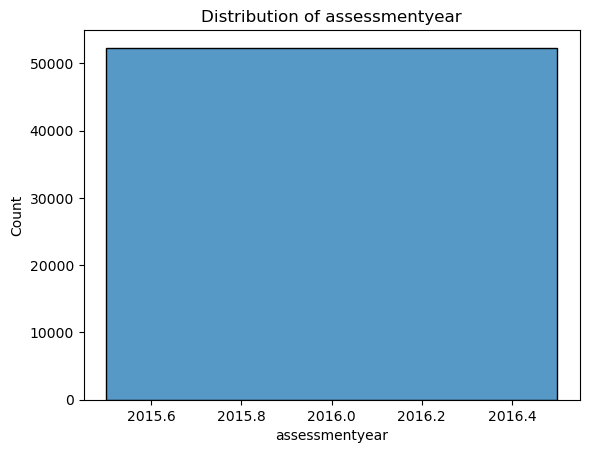

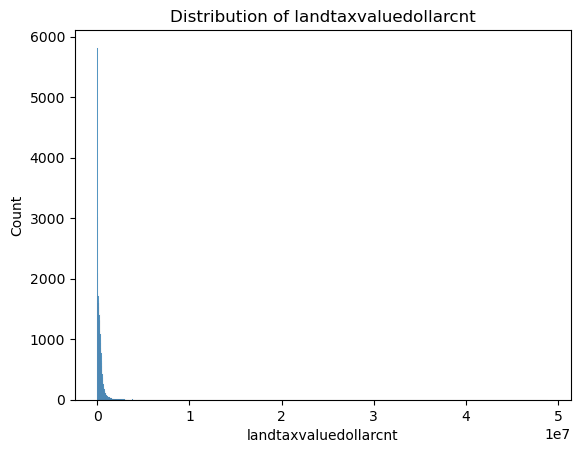

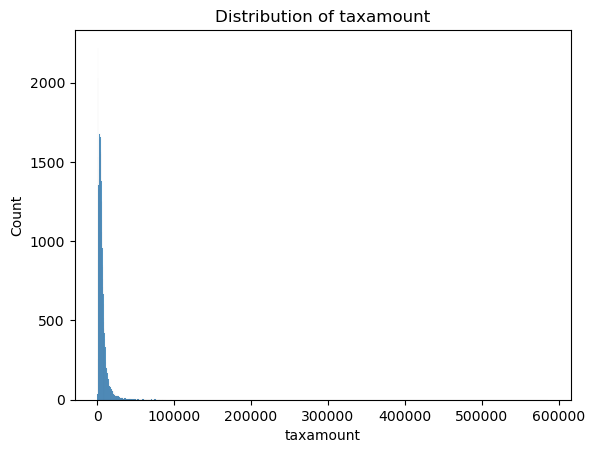

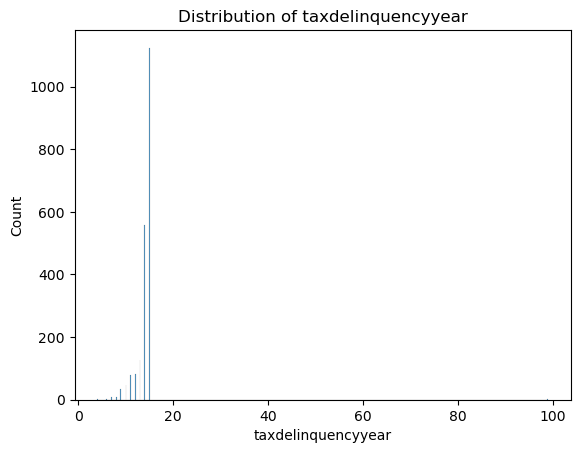

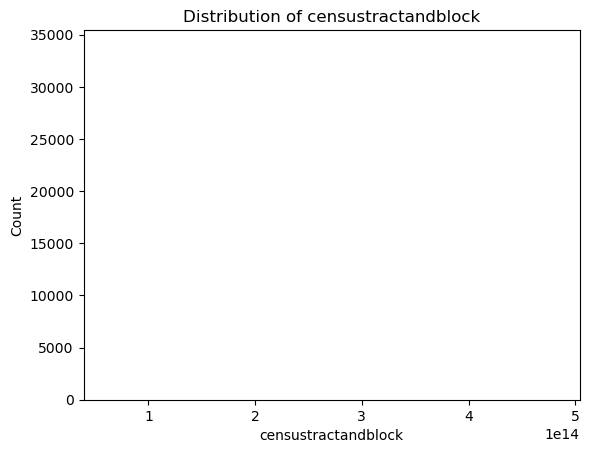

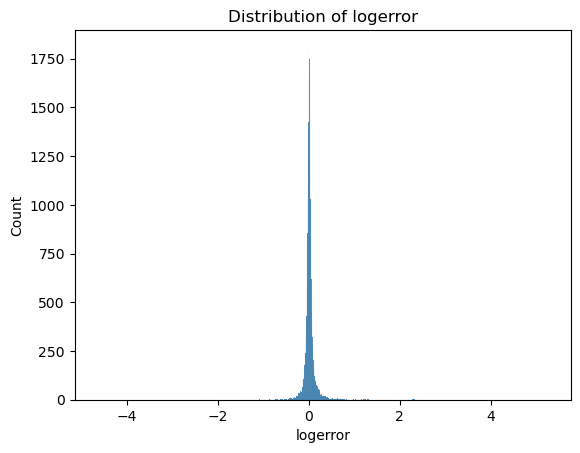

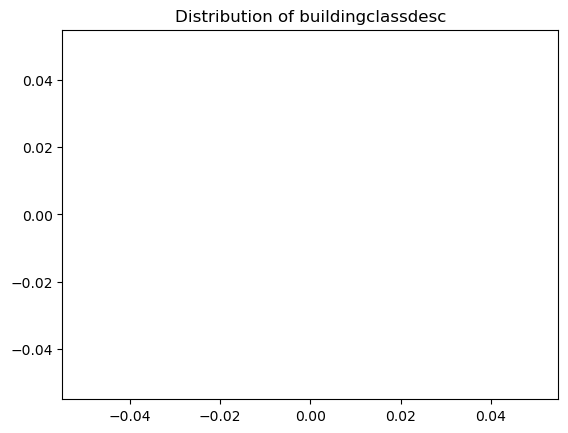

In [19]:
for col in df.columns[df.dtypes == 'float64']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

In [20]:
df.transactiondate.value_counts()

transactiondate
2017-06-30    809
2017-04-28    614
2017-05-31    565
2017-07-28    546
2017-08-31    528
             ... 
2017-05-07      1
2017-05-13      1
2017-05-20      1
2017-06-11      1
2017-09-25      1
Name: count, Length: 257, dtype: int64

In [21]:
df.unitcnt.value_counts()

unitcnt
1.00    33733
2.00       27
3.00        1
Name: count, dtype: int64

In [22]:
summarize.summarize(df)

Shape of Data: 
(52319, 68)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquaref

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

    The output should look like the table below:

    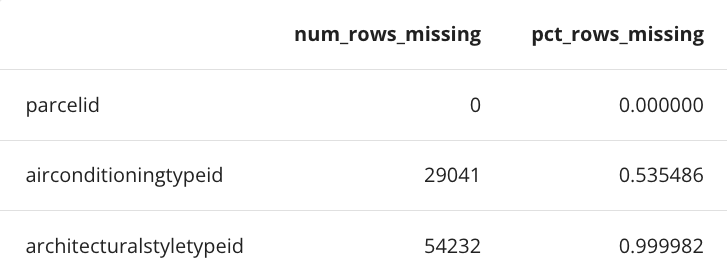

In [23]:
missing_counts = df.isna().sum()

total_rows = len(df)
missing_percentages = (missing_counts /total_rows) * 100

summary_df = pd.DataFrame({'Missing Values' : missing_counts, 'Percentage Missing (%)' : missing_percentages})

In [24]:
missing_counts

id                              0
parcelid                        0
airconditioningtypeid       38704
architecturalstyletypeid    52249
basementsqft                52272
                            ...  
buildingclassdesc           52319
heatingorsystemdesc         18486
propertylandusedesc             0
storydesc                   52272
typeconstructiondesc        52243
Length: 68, dtype: int64

In [25]:
total_rows

52319

In [26]:
missing_percentages

id                                         0.00
parcelid                                   0.00
airconditioningtypeid                     73.98
architecturalstyletypeid                  99.87
basementsqft                              99.91
                                   ...         
buildingclassdesc                        100.00
heatingorsystemdesc                       35.33
propertylandusedesc                        0.00
storydesc                                 99.91
typeconstructiondesc                      99.85
Length: 68, dtype: float64

In [27]:
summary_df

,Missing Values,Percentage Missing (%)
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,38704,73.98
architecturalstyletypeid,52249,99.87
basementsqft,52272,99.91
...,...,...
buildingclassdesc,52319,100.00
heatingorsystemdesc,18486,35.33
propertylandusedesc,0,0.00
storydesc,52272,99.91


In [28]:
wrangle.missing_values(df)

,Missing Values,Percentage Missing (%)
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,38704,73.98
architecturalstyletypeid,52249,99.87
basementsqft,52272,99.91
...,...,...
buildingclassdesc,52319,100.00
heatingorsystemdesc,18486,35.33
propertylandusedesc,0,0.00
storydesc,52272,99.91


--------------------------------------------------------------------------------------------------------------------

## Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [30]:
df = df[df['propertylandusetypeid'] == 261]

In [31]:
df.propertylandusetypeid.value_counts()

propertylandusetypeid
261.00    52319
Name: count, dtype: int64

In [32]:
# no duplicates and all are 'Single Residential Family properties code 261'

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

* The input:
    * A dataframe
    * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
* The output:
    * The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
* hint:
    * Look up the dropna documentation.
    * You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [33]:
wrangle.missing_values(df)

,Missing Values,Percentage Missing (%)
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,38704,73.98
architecturalstyletypeid,52249,99.87
basementsqft,52272,99.91
...,...,...
buildingclassdesc,52319,100.00
heatingorsystemdesc,18486,35.33
propertylandusedesc,0,0.00
storydesc,52272,99.91


In [34]:
df2 = wrangle.handle_missing_values(df, prop_required_column=0.10, prop_required_row=0.50)

In [35]:
df2

,id,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
2,11677,14186244,NaN,2.00,3.00,NaN,2.00,"1,243.00","1,243.00","6,059.00",...,"564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,Single Family Residential
3,2288172,12177905,NaN,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",...,"145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,NaN,Central,Single Family Residential
4,781532,12095076,1.00,3.00,4.00,9.00,3.00,"2,962.00","2,962.00","6,037.00",...,"773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Central,Central,Single Family Residential
6,1246926,12790562,NaN,3.00,4.00,9.00,3.00,"3,039.00","3,039.00","6,037.00",...,"220,583.00","2,016.00","43,056.00","3,104.19","60,375,002,024,006.00",-0.04,2017-01-02,NaN,Central,Single Family Residential
7,1639362,11104527,1.00,3.00,4.00,8.00,3.00,"2,540.00","2,540.00","6,037.00",...,"430,108.00","2,016.00","158,393.00","6,103.36","60,379,200,341,014.00",0.01,2017-01-02,Central,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52313,1373391,10722691,1.00,2.00,3.00,6.00,2.00,"1,570.00","1,570.00","6,037.00",...,"72,026.00","2,016.00","25,242.00","1,000.70","60,371,352,011,004.00",0.08,2017-09-19,Central,Central,Single Family Residential
52314,2274245,12412492,NaN,2.00,4.00,6.00,2.00,"1,633.00","1,633.00","6,037.00",...,"346,534.00","2,016.00","221,068.00","4,175.08","60,375,548,022,001.00",0.00,2017-09-19,NaN,Central,Single Family Residential
52315,673515,11000655,NaN,2.00,2.00,6.00,2.00,"1,286.00","1,286.00","6,037.00",...,"354,621.00","2,016.00","283,704.00","4,478.43","60,371,014,003,002.00",0.02,2017-09-20,NaN,Central,Single Family Residential
52317,1843709,12773139,1.00,1.00,3.00,4.00,1.00,"1,032.00","1,032.00","6,037.00",...,"49,546.00","2,016.00","16,749.00",876.43,"60,374,338,022,005.00",0.04,2017-09-21,Central,Central,Single Family Residential


3. Encapsulate your work inside of functions in a wrangle_zillow.py module.

##  accomplished

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
3,2288172,12177905,NaN,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",...,"145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,NaN,Central,Single Family Residential
4,781532,12095076,1.00,3.00,4.00,9.00,3.00,"2,962.00","2,962.00","6,037.00",...,"773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Central,Central,Single Family Residential
6,1246926,12790562,NaN,3.00,4.00,9.00,3.00,"3,039.00","3,039.00","6,037.00",...,"220,583.00","2,016.00","43,056.00","3,104.19","60,375,002,024,006.00",-0.04,2017-01-02,NaN,Central,Single Family Residential
7,1639362,11104527,1.00,3.00,4.00,8.00,3.00,"2,540.00","2,540.00","6,037.00",...,"430,108.00","2,016.00","158,393.00","6,103.36","60,379,200,341,014.00",0.01,2017-01-02,Central,Central,Single Family Residential
8,249412,13944538,13.00,2.50,3.00,NaN,2.50,"1,340.00","1,340.00","6,059.00",...,"319,668.00","2,016.00","223,051.00","4,078.08","60,590,888,014,006.00",0.05,2017-01-02,Yes,NaN,Single Family Residential


----------------------------------------------------------------------------------------------------------------------------------------------

## Mall Customers

### Notebook

1. Acquire data from the customers table in the mall_customers database.  
2. Summarize the data (include distributions and descriptive statistics).  
3. Detect outliers using IQR.  
4. Split data into train, validate, and test.  
5. Encode categorical columns using a one hot encoder (pd.get_dummies).  
6. Handles missing values.  
7. Scaling  

###  **Encapsulate your work in a wrangle_mall.py python module.**

## 1.

In [4]:
df = wrangle.acquire_mall()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2.

In [5]:
summarize.summarize(df)

Shape of Data: 
(200, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Descriptions:
|                |   count |   mean |     std |   min |   25% |   50% |    75% |   max |
|:---------------|--------:|-------:|--------:|------:|------:|------:|-------:|------:|
| customer_id    |     200 | 100.5  | 57.8792 |     1 | 50.75 | 100.5 | 150.25 |   200 |
| age            |     200 |  38.85 | 13.969  |    18 | 28.75 |  36   |  49    |    70 |
| annual_income  |     200 |  60.56 | 26.2647 |    15 | 41.5  |  61.5 |  78    |   137 |
| spending_score |     200 |  50.2  | 25.8

## 3.

In [6]:
for col in df.columns[df.dtypes == 'numbers']:
    
    df[f'{col}_outliers'] = summarize.identify_outliers(df[col])
    
df.head()   

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 4.

In [7]:
train, val, test = wrangle.train_val_test(df)
train.shape, val.shape, test.shape

((140, 5), (30, 5), (30, 5))

## 5.

In [8]:
dummy_gender = pd.get_dummies(train['gender'], prefix='gender')  # Use prefix to add a prefix to the new columns

train = pd.concat([train, dummy_gender], axis=1)

train.drop('gender', axis=1, inplace=True)

train = train.rename(columns=({'gender_Female' : 'female', 'gender_Male' : 'male'}))

In [9]:
train.head()

,customer_id,age,annual_income,spending_score,female,male
169,170,32,87,63,False,True
97,98,27,60,50,True,False
31,32,21,30,73,True,False
12,13,58,20,15,True,False
35,36,21,33,81,True,False


In [10]:
train = train.astype(int)

In [11]:
train.head()

,customer_id,age,annual_income,spending_score,female,male
169,170,32,87,63,0,1
97,98,27,60,50,1,0
31,32,21,30,73,1,0
12,13,58,20,15,1,0
35,36,21,33,81,1,0


## 6.

In [12]:
train = wrangle.handle_missing_values(train, prop_required_column=0.20, prop_required_row=0.75)

## 7.

In [13]:
# mms = MinMaxScaler()
# train, val, test = wrangle.scale_data(train, val, test, scaler=mms)

In [14]:
def prepare_data(df):
    # Summarize the data
    summarize.summarize(df)

    # Identify and create outlier columns
    for col in df.select_dtypes(include=['number']):
        df[f'{col}_outliers'] = summarize.identify_outliers(df[col])

    # Split the data into train, validation, and test sets
    train, val, test = wrangle.train_val_test(df)

    # Define the categories for 'gender'
    gender_categories = ['Male', 'Female']  # Adjust as needed based on your data

    # Create dummy variables for 'gender' in all sets
    for data_set in [train, val, test]:
        for category in gender_categories:
            data_set[f'gender_{category}'] = (data_set['gender'] == category).astype(int)

        # Handle missing values
        data_set = wrangle.handle_missing_values(data_set, prop_required_column=0.20, prop_required_row=0.75)

    # Select only the numeric columns for scaling (excluding 'gender' columns)
    numeric_columns = train.select_dtypes(include=['number']).columns

    # Scale the numeric data using Min-Max scaling
    mms = MinMaxScaler()
    for data_set in [train, val, test]:
        data_set[numeric_columns] = mms.fit_transform(data_set[numeric_columns])

    return train, val, test

In [15]:
# Load your data
df = wrangle.acquire_mall()

# Prepare the data using the function
train, val, test = prepare_data(df)

# Display the shapes of train, val, and test sets
print(train.shape, val.shape, test.shape)

Shape of Data: 
(200, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Descriptions:
|                |   count |   mean |     std |   min |   25% |   50% |    75% |   max |
|:---------------|--------:|-------:|--------:|------:|------:|------:|-------:|------:|
| customer_id    |     200 | 100.5  | 57.8792 |     1 | 50.75 | 100.5 | 150.25 |   200 |
| age            |     200 |  38.85 | 13.969  |    18 | 28.75 |  36   |  49    |    70 |
| annual_income  |     200 |  60.56 | 26.2647 |    15 | 41.5  |  61.5 |  78    |   137 |
| spending_score |     200 |  50.2  | 25.8

In [16]:
train.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers,gender_Male,gender_Female
169,0.85,Male,0.27,0.59,0.63,0.00,0.00,0.00,0.00,1.00,0.00
97,0.49,Female,0.17,0.37,0.50,0.00,0.00,0.00,0.00,0.00,1.00
31,0.16,Female,0.06,0.12,0.73,0.00,0.00,0.00,0.00,0.00,1.00
12,0.06,Female,0.77,0.04,0.14,0.00,0.00,0.00,0.00,0.00,1.00
35,0.18,Female,0.06,0.15,0.82,0.00,0.00,0.00,0.00,0.00,1.00
